# Task 1 Iris Flower Classification @ LetsGrowMore

## Completed by Kyle Parsotan


# Completed this project by using classification methods:

### 1. Decision Tree
### 2. Random Forest

#### class of iris plant: 
#### Iris Setosa, 
#### Iris Versicolour, 
#### or Iris Virginica

### 1. Petal length and width
### 2. sepal width and length

# Import data set and visualize the data set
### Data set from Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
  
# read the csv file
set = 'iris.csv'

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

dataset = pd.read_csv(set, names=columns)
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
dataset.shape

(150, 5)

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#count for each species 
dataset['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing the dataset

# check for null and 0s


In [6]:
dataset.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

# Scatter Plot

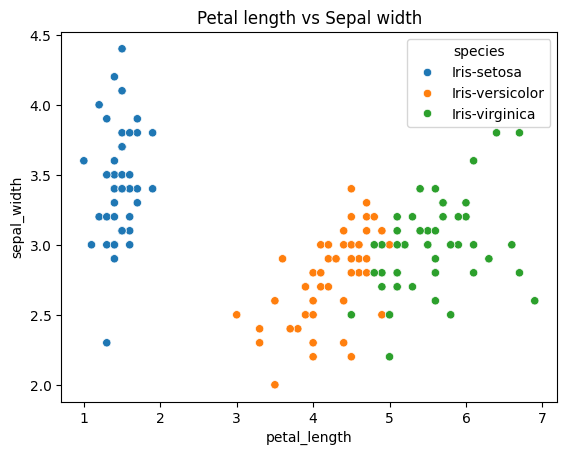

In [8]:
# scatter plot petal length vs sepal width for each species
sns.scatterplot(
    data=dataset,
    y='sepal_width',
    x='petal_length',
    hue='species'
)
plt.title("Petal length vs Sepal width")
plt.show()


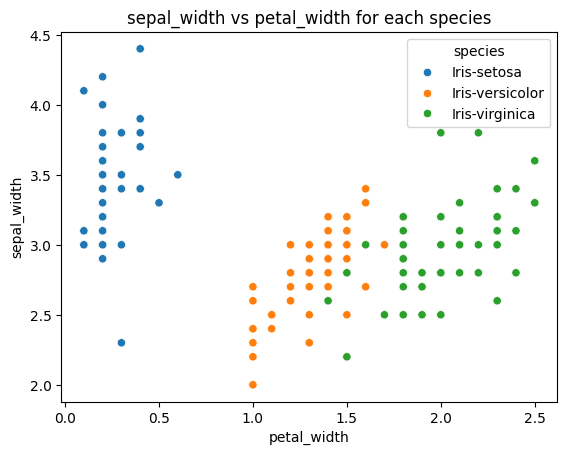

In [9]:
# scatter plot petal length vs sepal width for each species
sns.scatterplot(
    data=dataset,
    y='sepal_width',
    x='petal_width',
    hue='species'
)
plt.title("sepal_width vs petal_width for each species")
plt.show()

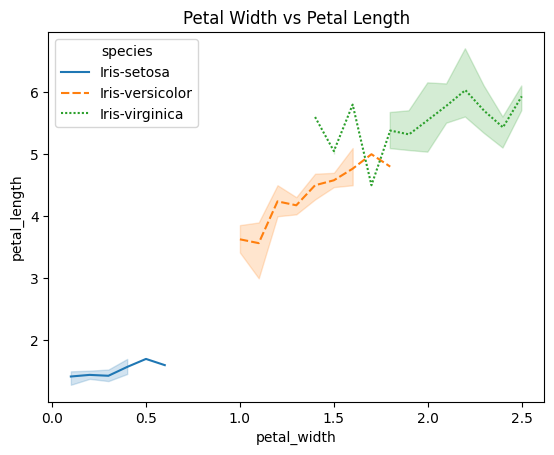

In [10]:
sns.lineplot(data=dataset, x="petal_width", y="petal_length", hue="species", style="species")
plt.title("Petal Width vs Petal Length")
plt.show()

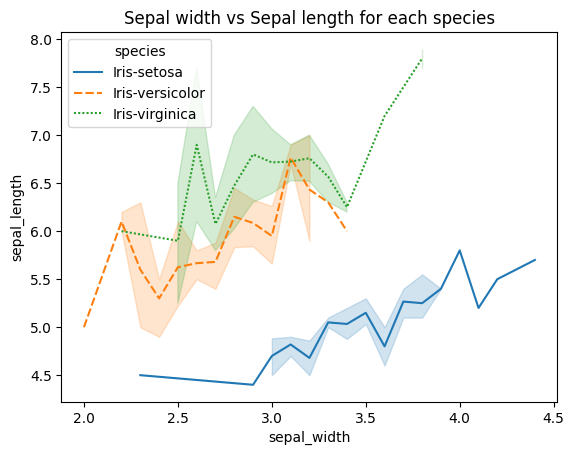

In [11]:
sns.lineplot(data=dataset, x="sepal_width", y="sepal_length", hue="species", style="species")
plt.title("Sepal width vs Sepal length for each species")
plt.show()

# Heat map

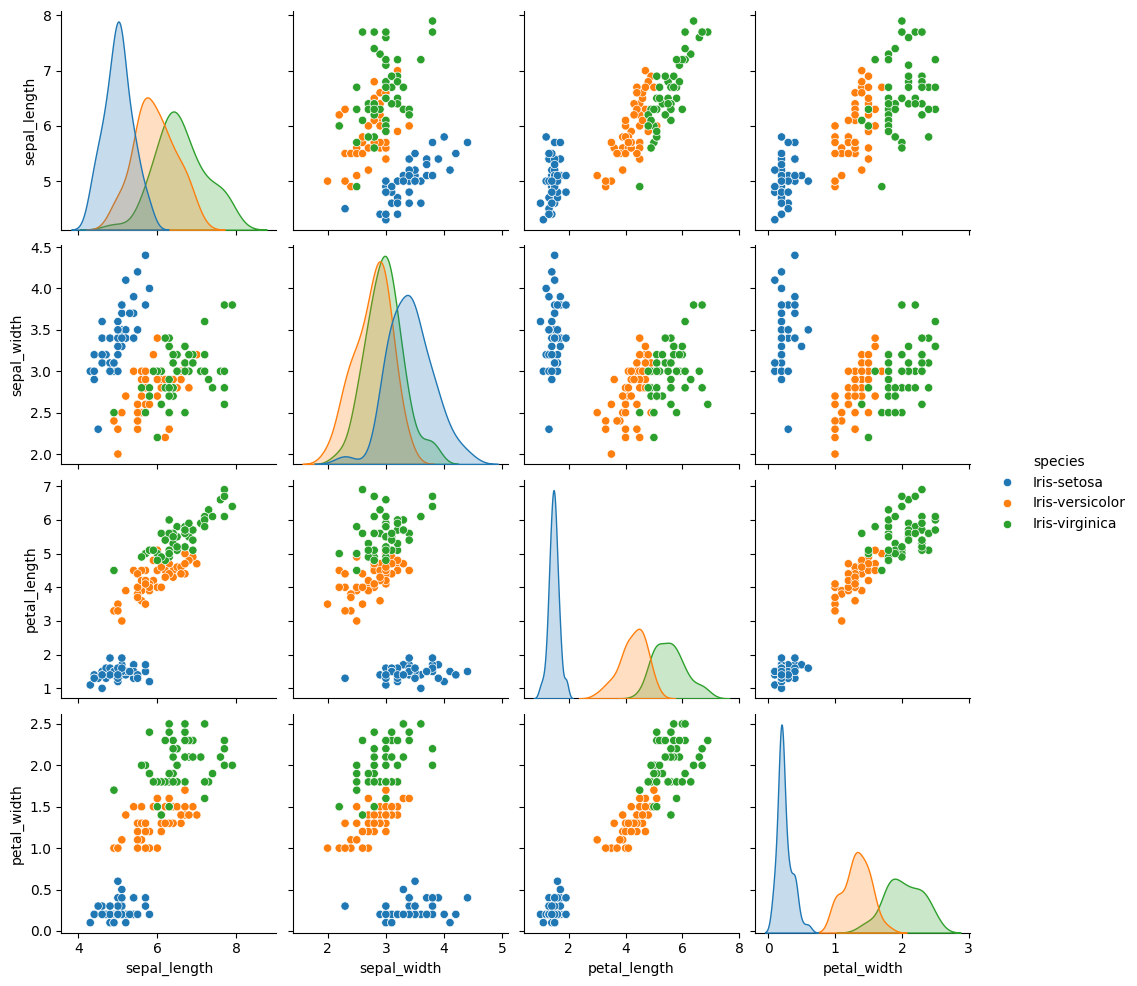

In [12]:
#pair plot based on species
sns.pairplot(dataset, hue="species")
# plt.title("Correlation between the length and width of each species")
plt.show()

# Correlation Matrix

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# read the csv file
set = 'iris.csv'

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

datasets = pd.read_csv(set, names=columns)

datasets.drop(datasets.columns[[4]], axis=1, inplace=True)

print(datasets)

# matrix = dataset.corr()
# print(matrix)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


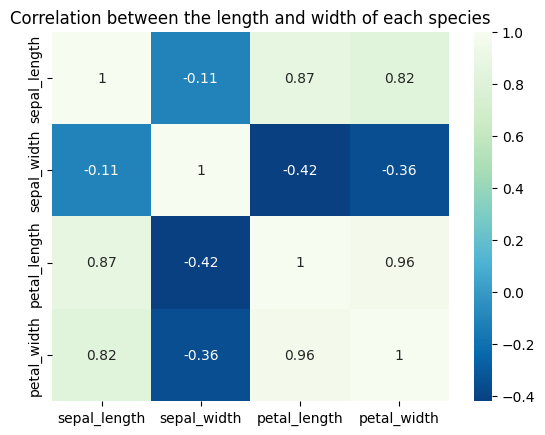

In [15]:
# plotting correlation matrix
# print(dataset)

sns.heatmap(datasets.corr(), annot=True, cmap='GnBu_r')
plt.title("Correlation between the length and width of each species")
plt.show()

# Model training

### LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression



## Intermediate Prediction using Decision Tree

### Decision Tree Regressor

In [17]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor

# dataset column
X = dataset.columns

# filtered dataset for missing values
filtered_dataset = datasets.dropna(axis=0)
filtered_dataset

# sepal length
l = filtered_dataset.sepal_length

# columns of datasets
stock_filteredFeatures = datasets.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for sepal length
dataset_model.fit(X, l)

DecisionTreeRegressor()

In [18]:
# making a prediction for the dataset
print("Making prediction for each sepal length:")
# dataset sepal length
print(datasets['sepal_length'])
# print(datasets['species'])
# prediction for the dataset
print("The Prediction are:")
pred = dataset_model.predict(X)
print(pred)

Making prediction for each sepal length:
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64
The Prediction are:
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


### Decision Tree Classifier for sepal width

In [19]:
# using decision tree to predict the different sepal width
from sklearn.tree import DecisionTreeRegressor

# Define the model
dataset_model = DecisionTreeRegressor()

# sepal width
y = datasets.sepal_width
y

# fit the model
dataset_model.fit(X, y)

DecisionTreeRegressor()

In [20]:
# model validation
from sklearn.metrics import mean_absolute_error

predicted_species = dataset_model.predict(X)
print("Predicted value for sepal width", mean_absolute_error(y, predicted_species))

Predicted value for sepal width 7.993605777301127e-17


In [21]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
flower_model = DecisionTreeRegressor()

# Fit model
flower_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dataset_model.predict(val_X)
print("Mean Absolute error for sepal width:", mean_absolute_error(val_y, val_predictions))

Mean Absolute error for sepal width: 1.0517902338554114e-16


### Decision Tree Classifier for sepal length

In [22]:
# using decision tree to predict the different sepal width
from sklearn.tree import DecisionTreeRegressor

# Define the model
dataset_model = DecisionTreeRegressor()

## sepal width
y = datasets.sepal_length
y

# fit the model
dataset_model.fit(X, y)

DecisionTreeRegressor()

In [23]:
# model validation
from sklearn.metrics import mean_absolute_error

predicted_species = dataset_model.predict(X)
print("Predicted value for sepal length", mean_absolute_error(y, predicted_species))

Predicted value for sepal length 3.138230416273776e-16


In [24]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
flower_model = DecisionTreeRegressor()
# Fit model
flower_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dataset_model.predict(val_X)
print("Mean Absolute error for sepal length:", mean_absolute_error(val_y, val_predictions))

Mean Absolute error for sepal length: 3.2722362831057244e-16


### Petal length

In [25]:
# using decision tree to predict the different petal length
from sklearn.tree import DecisionTreeRegressor

# Define the model
dataset_model = DecisionTreeRegressor()

## sepal width
y = datasets.petal_length
y

# fit the model
dataset_model.fit(X, y)

DecisionTreeRegressor()

In [26]:
# model validation
from sklearn.metrics import mean_absolute_error

predicted_species = dataset_model.predict(X)
print("Predicted value for petal length", mean_absolute_error(y, predicted_species))

Predicted value for petal length 9.177843670234627e-17


In [27]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
flower_model = DecisionTreeRegressor()
# Fit model
flower_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dataset_model.predict(val_X)
print("Mean Absolute error for petal length:", mean_absolute_error(val_y, val_predictions))

Mean Absolute error for petal length: 8.764918615461762e-17
